<h1> Twitter Analysis

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [93]:
# load the dataset
df = pd.read_csv(r'C:\Users\aedan\Data Science Notebooks\Twitter Analysis\afd_linke_tweets_1.csv')
df

,Time,User,Tweet,Favorites,Retweets
0,26/10/2022 12:17,AndreasKalbitz,"🚫 ""Wer Straftaten begeht, um vorgeblich das #K...",21.0,4.0
1,25/10/2022 15:32,AndreasKalbitz,"💯 ""Wir werden immer mehr!"" - Eindrücke von der...",14.0,4.0
2,24/10/2022 23:57,AndreasKalbitz,RT @Marion33755286: Auf einer von Bürgern orga...,0.0,2890.0
3,24/10/2022 14:51,AndreasKalbitz,"Und ich dachte in meiner Naivität, Tomatensupp...",51.0,6.0
4,21/10/2022 16:26,AndreasKalbitz,"💥 📢 ""Der Letzte macht das Licht aus!"" \n\nKund...",27.0,12.0
...,...,...,...,...,...
64776,07/04/2022 10:33,Linksfraktion,RT @AtesGuerpinar: Heute geht es im #Bundestag...,0.0,2.0
64777,07/04/2022 09:47,Linksfraktion,RT @DietmarBartsch: Beim Gezerre um die #Impfp...,0.0,9.0
64778,07/04/2022 08:54,Linksfraktion,RT @SarahAnnLincoln: Damit Menschen ohne Papie...,0.0,13.0
64779,07/04/2022 08:53,Linksfraktion,RT @voglerk: Ein Armutszeugnis: Erst rund 250 ...,0.0,10.0


We can see the dataset includes tweets and retweets, the number of favorites and the number of retweets.

<h3> Data cleaning and manipulation

Before we start we need to classify into tweets from the Afd and Die Linke.

In [94]:
# creating a dictionary
party_dict = {'AndreasKalbitz': 'AfD', 'M_HarderKuehnel': 'AfD', 'AfDProtschka': 'AfD', 'StBrandner': 'AfD', 'P_Plattform': 'AfD', 
        'BjoernHoecke': 'AfD', 'Alice_Weidel': 'AfD', 'Tino_Chrupalla': 'AfD', 'Beatrix_vStorch': 'AfD', 'Frohnmaier_AfD': 'AfD',
        'AfD': 'AfD', 'AfDimBundestag': 'AfD','dieLinke': 'Die_Linke', 'Linksfraktion': 'Die_Linke', 
        'Janine_Wissler':'Die_Linke', 'katjakipping': 'Die_Linke', 'SWagenknecht': 'Die_Linke', 'GregorGysi': 'Die_Linke', 
        'DietmarBartsch': 'Die_Linke', 'Amira_M_Ali': 'Die_Linke', 'schirdewan': 'Die_Linke', 'bodoramelow': 'Die_Linke', 
        'lgbeutin': 'Die_Linke', 'SusanneHennig': 'Die_Linke', 'PetraPauMaHe': 'Die_Linke'}

# adding a new column named 'Party'
df['Party'] = df['User'].map(party_dict)
df

,Time,User,Tweet,Favorites,Retweets,Party
0,26/10/2022 12:17,AndreasKalbitz,"🚫 ""Wer Straftaten begeht, um vorgeblich das #K...",21.0,4.0,AfD
1,25/10/2022 15:32,AndreasKalbitz,"💯 ""Wir werden immer mehr!"" - Eindrücke von der...",14.0,4.0,AfD
2,24/10/2022 23:57,AndreasKalbitz,RT @Marion33755286: Auf einer von Bürgern orga...,0.0,2890.0,AfD
3,24/10/2022 14:51,AndreasKalbitz,"Und ich dachte in meiner Naivität, Tomatensupp...",51.0,6.0,AfD
4,21/10/2022 16:26,AndreasKalbitz,"💥 📢 ""Der Letzte macht das Licht aus!"" \n\nKund...",27.0,12.0,AfD
...,...,...,...,...,...,...
64776,07/04/2022 10:33,Linksfraktion,RT @AtesGuerpinar: Heute geht es im #Bundestag...,0.0,2.0,Die_Linke
64777,07/04/2022 09:47,Linksfraktion,RT @DietmarBartsch: Beim Gezerre um die #Impfp...,0.0,9.0,Die_Linke
64778,07/04/2022 08:54,Linksfraktion,RT @SarahAnnLincoln: Damit Menschen ohne Papie...,0.0,13.0,Die_Linke
64779,07/04/2022 08:53,Linksfraktion,RT @voglerk: Ein Armutszeugnis: Erst rund 250 ...,0.0,10.0,Die_Linke


<h3> Tweet Analysis

In [95]:
# slicing the df into part afd and part linke
dfl = df[df['Party'] == 'Die_Linke']
print(dfl.shape)

dfa = df[df['Party'] == 'AfD']
print(dfa.shape)

(38712, 6)
(26063, 6)


In [96]:
# top tweeters afd
dfa.User.value_counts()

AfDimBundestag     3250
AfD                3249
StBrandner         3246
AfDProtschka       3236
Beatrix_vStorch    3231
Alice_Weidel       2861
Frohnmaier_AfD     2416
BjoernHoecke       1274
Tino_Chrupalla     1177
P_Plattform        1092
M_HarderKuehnel     588
AndreasKalbitz      443
Name: User, dtype: int64

In [97]:
# top tweeters die linke
dfl.User.value_counts()

Linksfraktion     3250
bodoramelow       3249
DietmarBartsch    3248
dieLinke          3247
katjakipping      3244
schirdewan        3238
PetraPauMaHe      3230
lgbeutin          3228
Janine_Wissler    3226
SusanneHennig     3225
GregorGysi        2842
SWagenknecht      2241
Amira_M_Ali       1244
Name: User, dtype: int64

What we see from the top two charts is that the people who tweet the most all have a similar amount of tweets. This is because of the restriction set by Twitter's API. As I do not own a research account I am not able to obtain each user's whole timeline, but only a maximum of around 3250 of the most recent tweets. This will give my below data analysis a recency bias towards recent political topics.

But what we can also infer from the above charts is that the politicians of Die Linke tweet much more frequent than those of the AfD. Around eigth politicans (and the two official Die Linke accounts) of Die Linke reach the maximum amount of requested tweets, whereas only three politicians (and the two official AfD accounts) of the Afd reach this limit. In fact, Bodo Ramelow the minister president of Thürigen is the most frequent tweeter with 70k+ tweets and Stephan Brander tops the AfD charts with around 31k+ tweets.

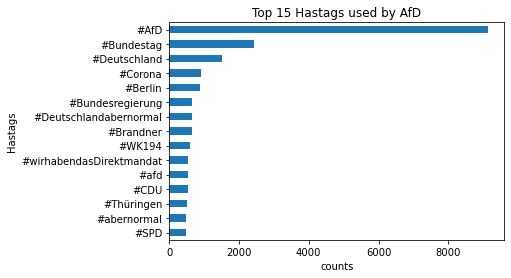

In [98]:
# visualising top hastags afd
dfa.Tweet.str.extractall(r'(\#\w*)')[0].value_counts()[:15].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 15 Hastags used by AfD')
plt.xlabel('counts')
plt.ylabel('Hastags')
plt.show()

If we take away the uninformative AfD tag we get:

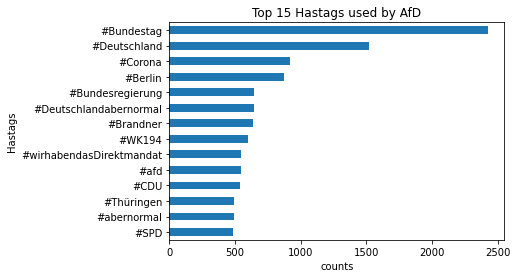

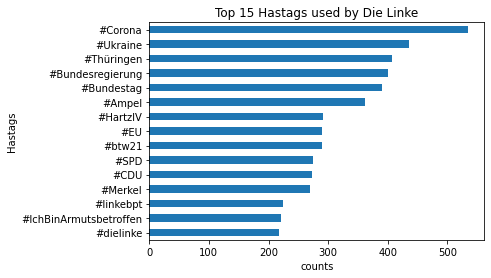

In [99]:
# visualising top hastags of afd
dfa.Tweet.str.extractall(r'(\#\w*)')[0].value_counts()[1:15].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 15 Hastags used by AfD')
plt.xlabel('counts')
plt.ylabel('Hastags')
plt.show()

# visualising top hastags die linke
dfl.Tweet.str.extractall(r'(\#\w*)')[0].value_counts()[:15].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 15 Hastags used by Die Linke')
plt.xlabel('counts')
plt.ylabel('Hastags')
plt.show()

We see the they share some similar tweets, such as a dominat recent topic like #Cornona. However, the two official party and Bundestags account may influence and bias these results. Especially, for the AfD side as only 3 accounts reach the API request limit. As such I will exclude them and do the same again.

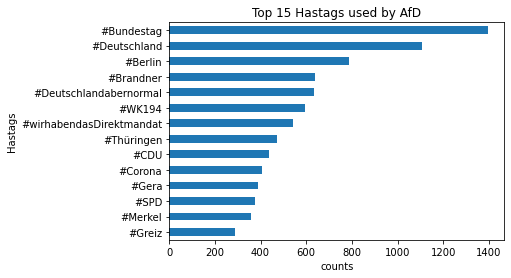

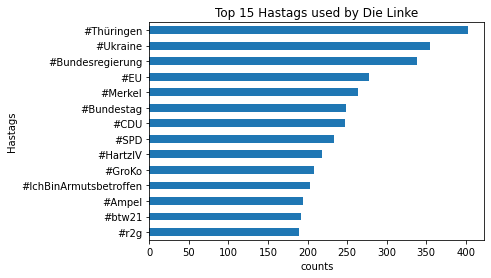

In [100]:
# list on what to exclude
lst_1 = ['AfD', 'AfDimBundestag']
lst_2 = ['Linksfraktion', 'dieLinke']

# afd bar plot
dfa[~dfa['User'].isin(lst_1)].Tweet.str.extractall(r'(\#\w*)')[0].value_counts()[1:15].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 15 Hastags used by AfD')
plt.xlabel('counts')
plt.ylabel('Hastags')
plt.show()

# linke bar plot
dfl[~dfl['User'].isin(lst_2)].Tweet.str.extractall(r'(\#\w*)')[0].value_counts()[1:15].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 15 Hastags used by Die Linke')
plt.xlabel('counts')
plt.ylabel('Hastags')
plt.show()

Now we can see for one that the first hastag of the AfD got much letts counts as the Bundestags accounts were removed. But looking at the Linke top hastags it is surprising to see that their top used previous hastag #Corona is now nowhere to be seen. This could be because in the Bundestag the covid pandemic was a very prevalent topic, hence these accounts kept retweeting tweets about it. But, the other politicians focused more on their own topics of expertise.

Comparing the two charts together we can divide the topics in the following groups:

**1. Opposition Work (AfD and Linke)**

Both parties use hastags to critise the government, such as #CDU, #Bundestag, #SPD and #Merkel. Likewise, the Linke use #GroKo, #Ampel and #Bundesregierung, whereas the #AfD uses #Berlin. This is typical for opposition parties as they want to make themselves look best by critising the government. These hashtags, however, do not tell us anything about the topic they talk about, but only the direction at who the critism is pointed at.

**2. Left Wing Politics (only Linke)**

This is a domain only used by the Linke. Hashtags include, #HartzIV, #IchBinArmutsbetroffen. These are all central topics of the left wing party. They are not happy with #HartzIV, the german unemployment benefit, and would like to increase it. Similarly, #IchBinArmutsbetroffen refers to young people and old pensioners who are on the brisk of becomming poor as they loose their job, have a low pension or are exposed to high energy or food prices.

Also, #r2g (Red, Red, Green) talks about the left politics of the Berlin federal government composed of SPD, Linke and Greens.

**3. Right Wing Politics (only AfD)**

Just like the previous point, within this category are only hastags used by the AfD, such as #Deutschland #Deutschlandabernormal. These two hashtags show the importance of the nationalism within the AfD party. Of couse, using the hashtag for Germany should not directly indicate right wing politics, but we know that the AfD is a far right party and they want to change Germany for the better in their eyes. They also hold controversly opionions about the Erinnerungskultur (Culture of Remembrance), which describes the interaction of a society with their past. They believe the soldiers of Nazi Germany should be remembered in a better light than they are currently.

Additionally, #Deutschlandabernormal refers to the AfD advertising slogan. In their advertisment video they talk about the problems with the Euro, open boarders, how Germany should rely on innovation to stop the climate change, the pandemic and how the government does not help the small people with their buisnesses, but only big corporations. The light in which these topics are represented clearly show a right wing ideology.

Other hashtags as #Greiz and especially #Gera refer to the rightwing extremist demonstrations of the town Gera in Thüringen east Germany. In response to these demonstrations the president of the office for the defense of the constitution in Thüringen, Stephan Krahmer, states that radicalisation and the threshold to use violence has decreased significantly. AfD politicans use this hashtag to show their support for this movement.

**4. Thürigen** (AfD and Linke)

This small minor group centers around the hashtag #Thüringen and is about the Thüringen federal government cirisis in 2020, in which for the first time the AfD almost became part of the government. Thomas Kemmerich running for the FDP accepted to form a coalition with the AfD, but days later reisgned and the previous minister president Bodo Ramelow of the Linke was reelected.

<h4> Word Clouds